In [1]:
import gym
import numpy as np

In [2]:
env = gym.make('FrozenLake-v0')

[2017-03-19 09:07:52,159] Making new env: FrozenLake-v0


In [3]:
#Initialize table with all zeros results in table = likelihood
Q = np.zeros([env.observation_space.n,env.action_space.n])
# Set learning parameters
lr = .9 # learning rate
y = .99 # gama
num_episodes = 5000 # how many time reset to first home
#create lists to contain total rewards and steps per episode
#jList = []
rList = []
for i in range(num_episodes):
    #Reset environment and get first new observation
    s = env.reset()
    rAll = 0
    d = False
    j = 0
    #The Q-Table learning algorithm
    while j < 99:
        j+=1
        #Choose an action by greedily (with noise) picking from Q table
        a = np.argmax(Q[s,:] + np.random.randn(1,env.action_space.n)*(1./(i+1)))
        #Get new state and reward from environment
        s1,r,d,_ = env.step(a)
        #Update Q-Table with new knowledge
        Q[s,a] = Q[s,a] + lr*(r + y*np.max(Q[s1,:]) - Q[s,a])
        rAll += r
        s = s1
        if d == True:
            break
    #jList.append(j)
    rList.append(rAll)        


In [4]:
print "Score over time: " +  str(sum(rList)/num_episodes)

Score over time: 0.5362


In [5]:
print "Final Q-Table Values"
print Q

Final Q-Table Values
[[  3.71399432e-01   3.69992171e-03   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   1.15456922e-03   1.58801880e-03   2.38145540e-01]
 [  1.54505987e-03   4.86991663e-03   1.36996504e-03   5.07118441e-01]
 [  5.26903115e-04   1.20783218e-03   9.13134121e-03   4.30936503e-01]
 [  5.81054946e-01   2.91722209e-04   5.26178178e-04   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  6.00045333e-03   1.42194942e-05   2.06593289e-06   2.13854433e-08]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  4.77106636e-04   3.13946806e-04   7.45759563e-04   8.89225270e-01]
 [  6.47059659e-04   7.51281928e-01   0.00000000e+00   4.92180662e-05]
 [  9.27794968e-01   6.87528820e-05   1.36749517e-04   1.65984471e-05]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   9.41189174e-01   2

In [1]:
import gym
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
env = gym.make('FrozenLake-v0')

[2017-03-19 09:19:16,788] Making new env: FrozenLake-v0


In [3]:
tf.reset_default_graph()

In [4]:
#These lines establish the feed-forward part of the network used to choose actions
inputs1 = tf.placeholder(shape=[1,16],dtype=tf.float32)
W = tf.Variable(tf.random_uniform([16,4],0,0.01))
Qout = tf.matmul(inputs1,W)
predict = tf.argmax(Qout,1)

#Below we obtain the loss by taking the sum of squares difference between the target and prediction Q values.
nextQ = tf.placeholder(shape=[1,4],dtype=tf.float32)
loss = tf.reduce_sum(tf.square(nextQ - Qout))
trainer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
updateModel = trainer.minimize(loss)


In [5]:
init = tf.initialize_all_variables()

# Set learning parameters
y = .99
e = 0.1
num_episodes = 2000
#create lists to contain total rewards and steps per episode
jList = []
rList = []
with tf.Session() as sess:
    sess.run(init)
    for i in range(num_episodes):
        #Reset environment and get first new observation
        s = env.reset()
        rAll = 0
        d = False
        j = 0
        #The Q-Network
        while j < 99:
            j+=1
            #Choose an action by greedily (with e chance of random action) from the Q-network
            a,allQ = sess.run([predict,Qout],feed_dict={inputs1:np.identity(16)[s:s+1]})
            if np.random.rand(1) < e:
                a[0] = env.action_space.sample()
            #Get new state and reward from environment
            s1,r,d,_ = env.step(a[0])
            #Obtain the Q' values by feeding the new state through our network
            Q1 = sess.run(Qout,feed_dict={inputs1:np.identity(16)[s1:s1+1]})
            #Obtain maxQ' and set our target value for chosen action.
            maxQ1 = np.max(Q1)
            targetQ = allQ
            targetQ[0,a[0]] = r + y*maxQ1
            #Train our network using target and predicted Q values
            _,W1 = sess.run([updateModel,W],feed_dict={inputs1:np.identity(16)[s:s+1],nextQ:targetQ})
            rAll += r
            s = s1
            if d == True:
                #Reduce chance of random action as we train the model.
                e = 1./((i/50) + 10)
                break
        jList.append(j)
        rList.append(rAll)
print "Percent of succesful episodes: " + str(sum(rList)/num_episodes) + "%"

Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-03-19 09:19:20,690] From <ipython-input-5-d370bb19644a>:1: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Percent of succesful episodes: 0.4845%


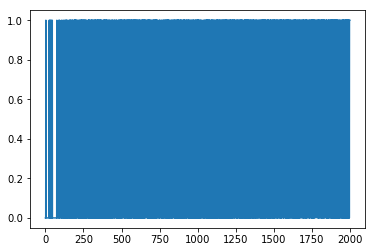

In [6]:
plt.plot(rList)

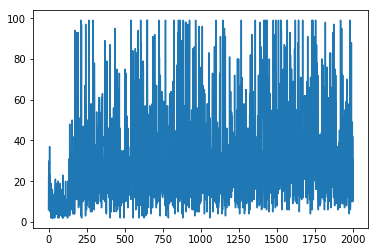

In [7]:
plt.plot(jList)

In [9]:
import tensorflow as tf
import numpy as np
import random
from collections import deque

from yahoo_finance import Share
import datetime

In [10]:
day_len = 15

In [24]:
stock = Share('2330.TW')
today = datetime.date.today()
stock_data = stock.get_historical('2016-01-01', str(today))
print len(stock_data)
stock_data.reverse() 

314


In [25]:
i = 0
while( i < len(stock_data)):
    if (int(stock_data[i].get('Volume')) <= 0):
        stock_data.remove(stock_data[i])
        i = -1
    i += 1
print len(stock_data)

288


In [26]:
my_train = np.zeros((len(stock_data)-day_len, day_len), dtype=np.float)
my_train

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [27]:
for i in range(0, len(my_train)):
    for j in range(0, day_len):
        my_train[i,j] = float(stock_data[i+j].get('Close'))
        #my_train[i,j] = data_rsi[i+j]
print my_train

[[ 139.5  138.   135.5 ...,  134.5  135.   138.5]
 [ 138.   135.5  133.  ...,  135.   138.5  139.5]
 [ 135.5  133.   134.  ...,  138.5  139.5  137.5]
 ..., 
 [ 190.   190.   188.5 ...,  183.5  186.5  186. ]
 [ 190.   188.5  188.5 ...,  186.5  186.   186.5]
 [ 188.5  188.5  189.  ...,  186.   186.5  190. ]]


In [15]:
class TWStock():
    def __init__(self, stock_data):
        self.stock_data = stock_data
        self.stock_index = 0
    
    def render(self):
        
        return 
    
    def reset(self):
        self.stock_index = 0
        return self.stock_data[self.stock_index]
    
    def step(self, action): 
        self.stock_index += 1
        action_reward = self.stock_data[self.stock_index][day_len-1] - self.stock_data[self.stock_index][day_len-2] 
        if (action == 0):
            action_reward = 0
        if (action == 2):
            action_reward = -1 * action_reward

        stock_done = False
        if self.stock_index >= len(self.stock_data)-1:
            stock_done = True
        else:
            stock_done = False
        return self.stock_data[self.stock_index], action_reward, stock_done, 0

In [41]:
# Hyper Parameters for DQN
GAMMA = 0.9 # discount factor for target Q
INITIAL_EPSILON = 0.5 # starting value of epsilon
FINAL_EPSILON = 0.01 # final value of epsilon
REPLAY_SIZE = 10000 # experience replay buffer size
BATCH_SIZE = 32 # size of minibatch

class DQN():
  
    def __init__(self, env):
        # init experience replay
        self.replay_buffer = deque()

        # init some parameters
        self.time_step = 0
        self.epsilon = INITIAL_EPSILON
    
        #self.state_dim = env.observation_space.shape[0]
        #self.action_dim = env.action_space.n
    
        self.state_dim = day_len
        self.action_dim = 3


        self.create_Q_network()
        self.create_training_method()

        # Init session
        self.session = tf.InteractiveSession()
        self.session.run(tf.initialize_all_variables())

    def create_Q_network(self):
        # network weights
        W1 = self.weight_variable([self.state_dim, 20])
        b1 = self.bias_variable([20])
        W2 = self.weight_variable([20, self.action_dim])
        b2 = self.bias_variable([self.action_dim])
        # input layer
        self.state_input = tf.placeholder("float",[None,self.state_dim])
        # hidden layers activation function
        h_layer = tf.nn.relu(tf.matmul(self.state_input,W1) + b1)
        # Q Value layer
        self.Q_value = tf.matmul(h_layer,W2) + b2
    
    def create_training_method(self):
        self.action_input = tf.placeholder("float",[None,self.action_dim])
        
        self.y_input = tf.placeholder("float",[None])
        Q_action = tf.reduce_sum(tf.multiply(self.Q_value,self.action_input),reduction_indices = 1)
        self.cost = tf.reduce_mean(tf.square(self.y_input - Q_action))
        #self.optimizer = tf.train.AdamOptimizer(0.0001).minimize(self.cost)
        self.optimizer = tf.train.RMSPropOptimizer(0.001,0.1).minimize(self.cost)
    
    def perceive(self,state,action,reward,next_state,done):
        one_hot_action = np.zeros(self.action_dim)
        one_hot_action[action] = 1
        self.replay_buffer.append((state,one_hot_action,reward,next_state,done))

        if len(self.replay_buffer) > REPLAY_SIZE:
            self.replay_buffer.popleft()

        if len(self.replay_buffer) > BATCH_SIZE:
            self.train_Q_network()
        
    def train_Q_network(self):
        self.time_step += 1

        # Step 1: obtain random minibatch from replay memory
        minibatch = random.sample(self.replay_buffer,BATCH_SIZE)
        state_batch = [data[0] for data in minibatch]
        action_batch = [data[1] for data in minibatch]
        reward_batch = [data[2] for data in minibatch]
        next_state_batch = [data[3] for data in minibatch]

        # Step 2: calculate y
        y_batch = []
        Q_value_batch = self.Q_value.eval(feed_dict={self.state_input:next_state_batch})

        for i in range(0,BATCH_SIZE):
            done = minibatch[i][4]
            if done:
                y_batch.append(reward_batch[i])
            else :
                y_batch.append(reward_batch[i] + GAMMA * np.max(Q_value_batch[i]))

        self.optimizer.run(feed_dict={
          self.y_input:y_batch,
          self.action_input:action_batch,
          self.state_input:state_batch
          })
    
    def egreedy_action(self,state):
        Q_value = self.Q_value.eval(feed_dict = {
          self.state_input:[state]})[0]
        if random.random() <= self.epsilon:
            return random.randint(0,self.action_dim - 1)
        else:
            return np.argmax(Q_value)

        self.epsilon -= (INITIAL_EPSILON - FINAL_EPSILON)/10000


    def action(self,state):
        return np.argmax(self.Q_value.eval(feed_dict = {
          self.state_input:[state]})[0])


    def weight_variable(self,shape):
        initial = tf.truncated_normal(shape)
        return tf.Variable(initial)

    def bias_variable(self,shape):
        initial = tf.constant(0.01, shape = shape)
        return tf.Variable(initial)
    
    
# ---------------------------------------------------------
 # Hyper Parameters
ENV_NAME = 'CartPole-v0'
EPISODE = 10000 # Episode limitation
STEP = 1000   #300 # Step limitation in an episode
TEST = 100 # The number of experiment test every 100 episode


def main():

    # initialize OpenAI Gym env and dqn agent
    #env = gym.make(ENV_NAME)
    env = TWStock(my_train) 
    agent = DQN(env)

    print ''
    for episode in xrange(EPISODE):
    
        # initialize task
        state = env.reset()

        # Train
        for step in xrange(STEP):
            action = agent.egreedy_action(state) # e-greedy action for trai
        
            next_state,reward,done,_ = env.step(action)
    
          # Define reward for agent
            reward_agent = -1 if done else 0.1
            agent.perceive(state,action,reward,next_state,done)
            state = next_state
            if done:
                break
 
        # Test every 100 episodes
        if episode % 100 == 0:
            total_reward = 0

            for i in xrange(TEST):
                state = env.reset()

                for j in xrange(STEP):
                    env.render()
                    action = agent.action(state)   # direct action for test
                    state,reward,done,_ = env.step(action)
                    total_reward += reward
                    if done:
                        break

            ave_reward = total_reward/TEST
            print 'episode: ',episode,'Evaluation Average Reward:',ave_reward
            if ave_reward >= 200:
                print '' 
                break
    

if __name__ == '__main__':
    main()


Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-03-21 11:40:36,442] From <ipython-input-41-cc90cc46b589>:30: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.



episode:  0 Evaluation Average Reward: -25.5
episode:  100 Evaluation Average Reward: 17.5
episode:  200 Evaluation Average Reward: -23.5
episode:  300 Evaluation Average Reward: 51.5
episode:  400 Evaluation Average Reward: -2.5
episode:  500 Evaluation Average Reward: 9.0
episode:  600 Evaluation Average Reward: 53.0
episode:  700 Evaluation Average Reward: 56.5
episode:  800 Evaluation Average Reward: 0.0
episode:  900 Evaluation Average Reward: 62.0
episode:  1000 Evaluation Average Reward: 96.5
episode:  1100 Evaluation Average Reward: 90.0
episode:  1200 Evaluation Average Reward: 87.5
episode:  1300 Evaluation Average Reward: 58.5
episode:  1400 Evaluation Average Reward: 76.0
episode:  1500 Evaluation Average Reward: 127.5
episode:  1600 Evaluation Average Reward: 92.0
episode:  1700 Evaluation Average Reward: 122.5
episode:  1800 Evaluation Average Reward: 55.0
episode:  1900 Evaluation Average Reward: 66.5
episode:  2000 Evaluation Average Reward: 67.0
episode:  2100 Evaluat

In [38]:
print(tf.__version__)

1.0.0
